# Course Title: Data Analytics & Statistics in Python
## Metropolia University of Applied Sciences
## Week 4: Hypothesis Testing
### Date: 26.3.2025

<table "<table style="width: 100%;">
  <tr>
    <td style="text-align: left; vertical-align: middle;">
      <ul style="list-style: none; padding-left: 0;">
        <li><strong>Instructor</strong>: Hamed Ahmadinia, Ph.D</li>
        <li><strong>Email</strong>: hamed.ahmadinia@metropolia.fi
        <li><strong>Web</strong>: www.ahmadinia.fi</li>          </li>
      </ul>
    </td>
  </tr>
</table>

**¬© 2025 Hamed Ahmadinia ‚Äì [CC BY-NC 4.0](https://creativecommons.org/licenses/by-nc/4.0/)**

## üìå Choosing the Right Hypothesis Test

We follow a clear decision-making process when selecting a statistical test:

1. **Check data distribution**  
   Use **Shapiro-Wilk test** or **histograms/KDE plots** to assess if the data is approximately normal.

2. **Determine sample structure**  
   - **One-sample**: Compare a group to a known value.
   - **Two-sample**: Compare two independent groups.
   - **Paired**: Compare the same group under two conditions.
   - **Three or more groups**: Compare more than two independent samples (e.g., Bitcoin vs Ethereum vs Monero)

3. **Choose the appropriate test**  
   Based on distribution and sample type:
   - üß™ **t-test**: Normal data, small sample (n < 30)
   - üìä **z-test**: Normal data, large sample (n ‚â• 30)
   - üìâ **Mann-Whitney U**: Non-normal, 2 independent groups
   - üîÑ **Paired t-test**: Normal paired samples
   - ‚úçÔ∏è **Wilcoxon Signed-Rank Test**: Non-parametric alternative for paired samples (e.g., before/after with non-normal data)
   - üìà **Kolmogorov-Smirnov**: Compare to a theoretical distribution (e.g., normal)
   - üü¶ **Chi-Square**: For categorical/binned data
   - üßÆ **McNemar Test**: For paired binary categorical outcomes (e.g., yes/no before and after treatment)
üß™ **ANOVA**: For comparing means of **three or more independent groups** (e.g., BTC vs ETH vs XMR). Assumes normality and equal variances.

4. **Interpret Results**  
   - If **p-value < 0.05** ‚Üí reject null hypothesis ‚Üí significant result  
   - Otherwise, fail to reject ‚Üí not enough evidence for difference

---

## üìä Parametric vs Non-Parametric Test Map

Below is a visual guide for selecting between parametric and non-parametric tests:

- **Parametric Tests** are statistical methods that assume underlying statistical distributions (usually normal). These tests include **t-tests**, **z-tests**, and **ANOVA**. They are powerful and efficient when assumptions are met, especially with large and symmetric datasets.

- **Non-Parametric Tests**, on the other hand, do not assume a specific distribution. These are preferred when:
  - Data is skewed or ordinal
  - Sample sizes are small
  - You can't confidently assume normality

Common examples include the **Mann-Whitney U**, **Wilcoxon Signed-Rank**, **Chi-Square**, **McNemar**, and **Kolmogorov-Smirnov (K-S)** tests.

<img src='https://stemcellthailand.org/wp-content/uploads/2023/11/parametric-vs-nonparametric.png' alt='Parametric vs Non-Parametric Tests' width='650'/>

> ‚úÖ **Comment**: This diagram helps clarify which statistical test to use based on assumptions about your data. If your data is clean, normal, and continuous ‚Üí use parametric tests. Otherwise, go with non-parametric alternatives for more robust results.

In [195]:
# Import necessary libraries
import warnings  # For controlling warnings during execution
warnings.filterwarnings("ignore")  # Ignore warnings to keep output clean

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and working with arrays

import matplotlib.pyplot as plt  # For creating basic plots and charts
import seaborn as sns  # For enhanced statistical visualizations

# Import statistical tests from SciPy
from scipy.stats import (
    ttest_1samp,        # One-sample t-test
    ttest_ind,          # Independent two-sample t-test
    ttest_rel,          # Paired t-test
    mannwhitneyu,       # Non-parametric test for two independent samples
    shapiro,            # Test for normality (Shapiro-Wilk)
    kstest,             # Kolmogorov-Smirnov test for distribution comparison
    chisquare           # Chi-square goodness-of-fit test
)

from statsmodels.stats.weightstats import ztest  # Z-test for means (one- or two-sample)

import datetime  # For working with date and time objects
import requests  # For making HTTP requests (e.g., calling APIs)

from IPython.display import Markdown, display, Image  # For rich notebook outputs (e.g., Markdown, images)

# Set seaborn visual style for better-looking plots
sns.set(style="whitegrid")

from scipy.stats import f_oneway  # One-way ANOVA for comparing means across multiple groups
from statsmodels.stats.contingency_tables import mcnemar  # McNemar's test for paired nominal data
from scipy.stats import wilcoxon  # Wilcoxon signed-rank test for paired samples (non-parametric)

In [233]:
# 1: Load Real-Time Crypto Price Data (Last 90 Days)

def fetch_prices(coin_id, days=90):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"  # API endpoint
    params = {"vs_currency": "usd", "days": days, "interval": "daily"}  # Request parameters
    r = requests.get(url, params=params)  # Make the GET request
    data = r.json()["prices"]  # Extract price data from the response

    # Convert to DataFrame and format columns
    df = pd.DataFrame(data, columns=["timestamp", "price"])
    df["date"] = pd.to_datetime(df["timestamp"], unit="ms")  # Convert timestamp to datetime

    # Set date as index and return only the price series
    return df.set_index("date")["price"]

# Fetch daily prices for the past 90 days for three cryptocurrencies
btc = fetch_prices("bitcoin")
eth = fetch_prices("ethereum")
xmr = fetch_prices("monero")

# Combine the three Series into a single DataFrame
crypto_df = pd.concat([btc, eth, xmr], axis=1)

# Rename columns for clarity
crypto_df.columns = ["Bitcoin", "Ethereum", "Monero"]

# Drop any rows with missing values (dates where not all three cryptos have data)
crypto_df.dropna(inplace=True)

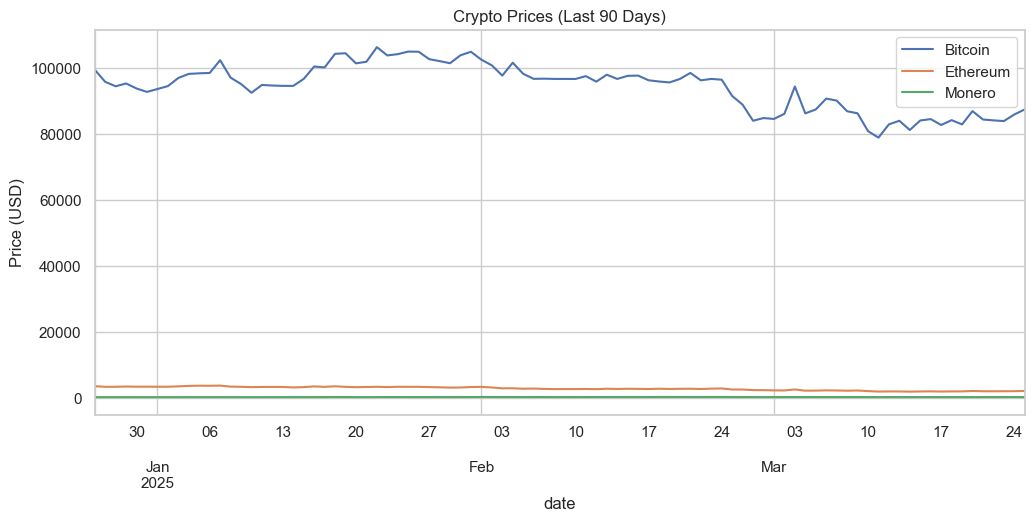

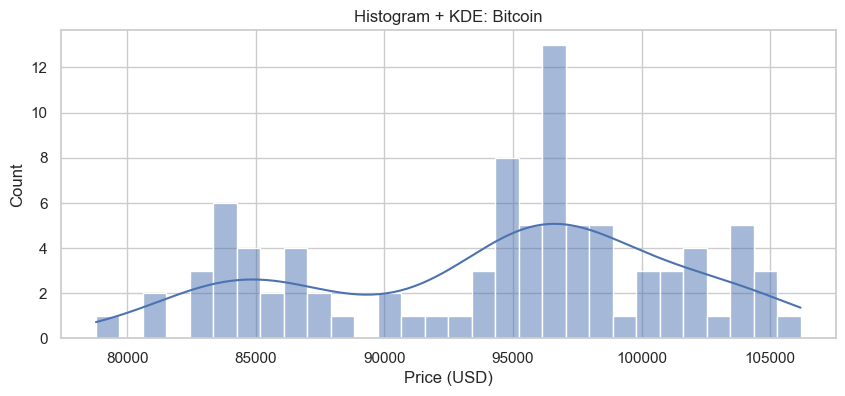

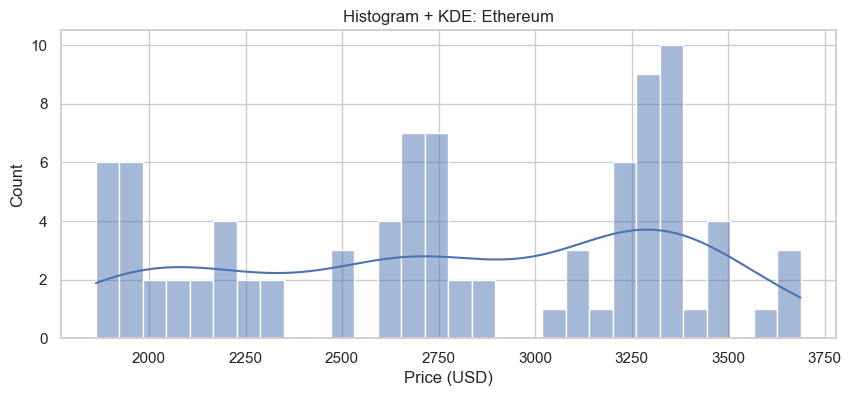

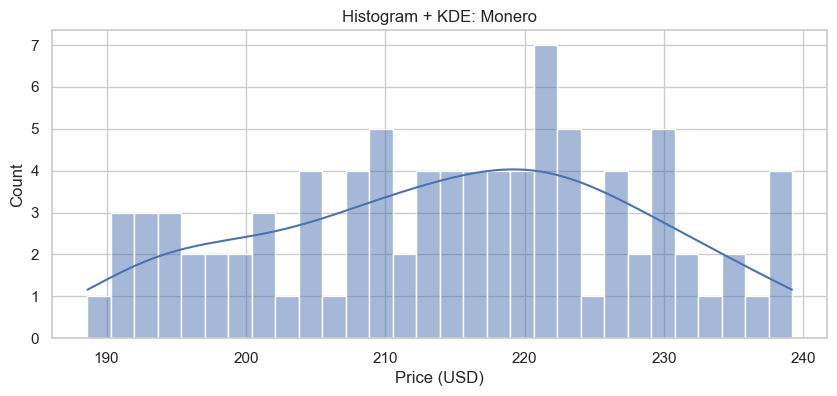

In [235]:
# 2: Visualize Prices and Distributions

# Plot the time-series of all three cryptocurrencies over the past 90 days
crypto_df.plot(
    title="Crypto Prices (Last 90 Days)",
    ylabel="Price (USD)",
    figsize=(12, 5)
)
plt.show()

# Plot histogram + KDE (Kernel Density Estimate) for each crypto's price distribution
for coin in crypto_df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(crypto_df[coin], kde=True, bins=30)  # Histogram with density curve
    plt.title(f"Histogram + KDE: {coin}")
    plt.xlabel("Price (USD)")
    plt.show()  

In [237]:
# 3: Check Normality

# Loop through each cryptocurrency column and perform the Shapiro-Wilk test
for coin in crypto_df.columns:
    stat, p = shapiro(crypto_df[coin])  # Perform normality test
    # Interpret the result based on p-value
    print(f"Shapiro-Wilk test for {coin}: p = {p:.4f} ({'Normal' if p > 0.05 else 'Not Normal'})")

Shapiro-Wilk test for Bitcoin: p = 0.0004 (Not Normal)
Shapiro-Wilk test for Ethereum: p = 0.0000 (Not Normal)
Shapiro-Wilk test for Monero: p = 0.0669 (Normal)


## üîç Normality Check with Shapiro-Wilk Test

Before applying any parametric statistical tests (like t-tests or ANOVA), it is essential to verify whether the data follows a **normal distribution**. The **Shapiro-Wilk test** is commonly used for this purpose.

> üìå **Interpretation**:  
> - **Null Hypothesis (H‚ÇÄ)**: The data is normally distributed.  
> - **Alternative Hypothesis (H‚ÇÅ)**: The data is **not** normally distributed.  
> - If **p < 0.05**, we reject the null hypothesis ‚Üí data is **not normal**.  
> - If **p ‚â• 0.05**, we **do not reject** the null ‚Üí data is considered normal.

---
- Since **Bitcoin** and **Ethereum** both fail the normality test, **non-parametric tests** (e.g., Mann-Whitney U, Wilcoxon) are safer choices for hypothesis testing involving these coins.
- **Monero**, however, appears to follow a normal distribution. This allows us to use **parametric tests** like the **t-test** or **ANOVA** when analyzing Monero prices.

> üß† **Insight**: Always test for normality before selecting your hypothesis test. This ensures statistical validity and reduces the risk of incorrect conclusions.

Z-test (Monero today vs 90-day mean): z-stat = -12.840, p-value = 0.000


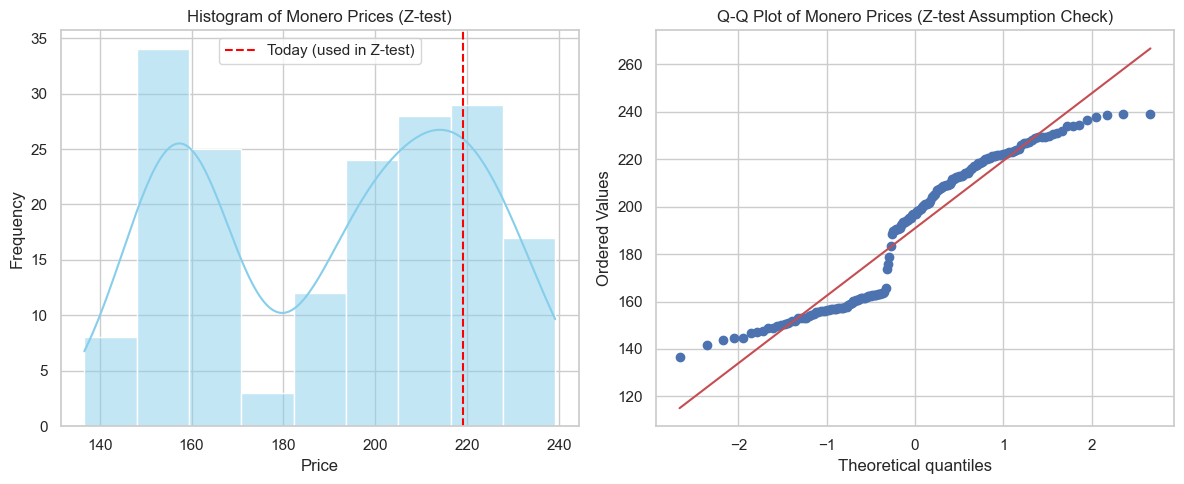

In [209]:
# 4.1: One-Sample Z-Test on Monero (90 Days)

# Get the most recent Monero price
monero_today = crypto_df['Monero'].iloc[-1]

# Perform a one-sample Z-test comparing today's price to the 90-day mean
z_stat_xmr, p_z_xmr = ztest(crypto_df['Monero'], value=monero_today)

# Print the test statistic and p-value
print(f"Z-test (Monero today vs 90-day mean): z-stat = {z_stat_xmr:.3f}, p-value = {p_z_xmr:.3f}")

plt.figure(figsize=(12, 5))

# Histogram with KDE for Monero prices
plt.subplot(1, 2, 1)
sns.histplot(crypto_df['Monero'], kde=True, color='skyblue')
plt.axvline(monero_today, color='red', linestyle='--', label='Today (used in Z-test)')
plt.title("Histogram of Monero Prices (Z-test)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()

# Q-Q plot to visually assess normality assumption for Z-test
plt.subplot(1, 2, 2)
import scipy.stats as stats
stats.probplot(crypto_df['Monero'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Monero Prices (Z-test Assumption Check)")

# Adjust layout for cleaner display
plt.tight_layout()
plt.show()

## üìä One-Sample Z-Test (Monero)

We applied a **one-sample Z-test** to determine whether the **latest Monero price** is significantly different from the **90-day historical average**.

### üîé Test Details

- **Null Hypothesis (H‚ÇÄ)**: The current Monero price is equal to the 90-day average.
- **Alternative Hypothesis (H‚ÇÅ)**: The current price is **different** from the average.
- **Test Used**: `ztest()` from `statsmodels.stats.weightstats`
- **Assumptions**:
  - Data is approximately normally distributed (‚úÖ confirmed via Shapiro-Wilk test)
  - Sample size is large (n = 90)
---
- The **p-value < 0.05**, so we **reject the null hypothesis**.
- The latest Monero price is **statistically significantly different** from the 90-day average.
- Given the large absolute value of the Z-statistic, this difference is also **strongly significant**.

> üí¨ **Conclusion**: Monero‚Äôs current market price has deviated notably from its recent historical behavior, indicating a potential market event or trend shift worth investigating.


T-test (Monero 29-day sample vs today's price): t-stat = -54.315, p-value = 0.000


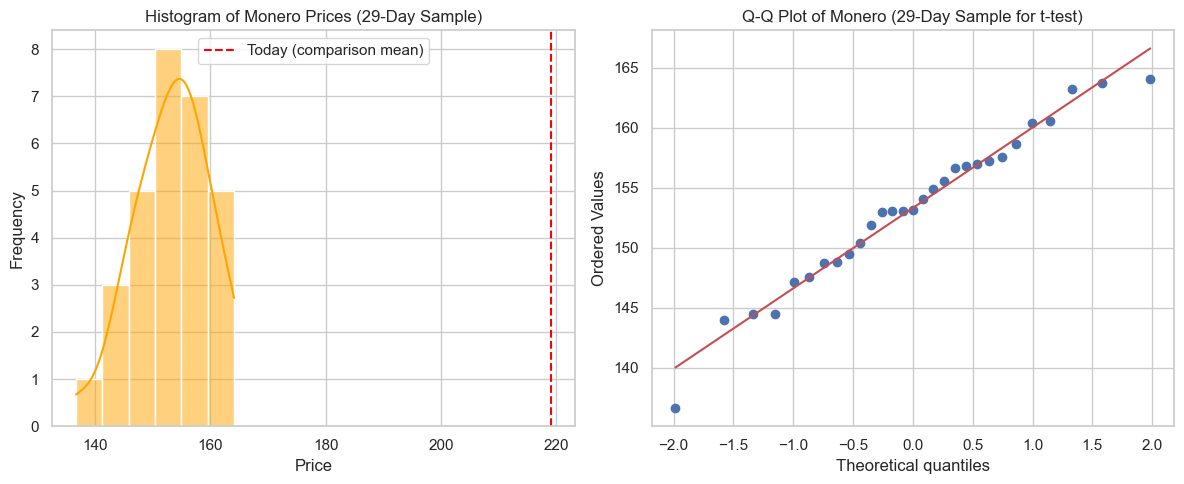

In [211]:
# 4.2: One-Sample t-Test on Monero (First 29 Days)

# Extract the first 29 days of Monero prices
xmr_29 = crypto_df['Monero'].iloc[:29]

# Calculate the mean of this 29-day sample (optional, for context)
xmr_mean_29 = xmr_29.mean()

# Perform a one-sample t-test: is the 29-day sample mean different from today's price?
t_stat_xmr_29, p_val_xmr_29 = ttest_1samp(xmr_29, popmean=monero_today)

# Display test statistic and p-value
print(f"\nT-test (Monero 29-day sample vs today's price): t-stat = {t_stat_xmr_29:.3f}, p-value = {p_val_xmr_29:.3f}")

plt.figure(figsize=(12, 5))

# Histogram + KDE for the 29-day sample
plt.subplot(1, 2, 1)
sns.histplot(xmr_29, kde=True, color='orange')
plt.axvline(monero_today, color='red', linestyle='--', label="Today (comparison mean)")
plt.title("Histogram of Monero Prices (29-Day Sample)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()

# Q-Q plot to check for normality of the sample (assumption for t-test)
plt.subplot(1, 2, 2)
import scipy.stats as stats
stats.probplot(xmr_29, dist="norm", plot=plt)
plt.title("Q-Q Plot of Monero (29-Day Sample for t-test)")

# Adjust layout for a clean display
plt.tight_layout()
plt.show()

## üìâ One-Sample t-Test (Monero 29-Day Sample)

We performed a **one-sample t-test** to evaluate whether the average Monero price over the **first 29 days** differs significantly from the **current (latest) Monero price**.

### üîé Test Details

- **Null Hypothesis (H‚ÇÄ)**: The 29-day sample mean is equal to the latest price.
- **Alternative Hypothesis (H‚ÇÅ)**: The 29-day sample mean is **different** from the latest price.
- **Test Used**: `ttest_1samp()` from `scipy.stats`
- **Assumptions**:
  - Data is approximately normal (‚úÖ confirmed with Q-Q plot and visual KDE)
  - Sample size is moderate (n = 29)

---

- The **p-value is far below 0.05**, so we **reject the null hypothesis**.
- The 29-day sample mean is **statistically significantly different** from today‚Äôs price.
- The large magnitude of the t-statistic (|t| > 50) indicates a **very strong deviation**, suggesting Monero's price may have recently shifted drastically.

> üí¨ **Conclusion**: The early trend in Monero prices no longer reflects current pricing, supporting the use of rolling or adaptive statistical models.

In [213]:
# 5: Kolmogorov-Smirnov Test

# Perform the K-S test to compare the distribution of Monero prices 
# against a normal distribution with the same mean and standard deviation
ks_stat, p_ks = kstest(
    crypto_df["Monero"],
    'norm',
    args=(crypto_df["Monero"].mean(), crypto_df["Monero"].std())
)

# Print the result of the K-S test
print(f"\nKolmogorov-Smirnov test (Monero vs Normal Dist): p-value = {p_ks:.3f}")


Kolmogorov-Smirnov test (Monero vs Normal Dist): p-value = 0.000


## üìà Kolmogorov‚ÄìSmirnov (K-S) Test: Monero vs Normal Distribution

The **Kolmogorov‚ÄìSmirnov test** compares the distribution of observed data to a **reference distribution**‚Äîin this case, the **normal distribution**.

### üîé Test Details

- **Null Hypothesis (H‚ÇÄ)**: The Monero prices follow a normal distribution.
- **Alternative Hypothesis (H‚ÇÅ)**: The Monero prices **do not** follow a normal distribution.
- **Test Used**: `kstest()` from `scipy.stats`  
- **Reference Distribution**: Normal (`norm`)

---

### üìå Interpretation

- Since the **p-value is below 0.05**, we **reject the null hypothesis**.
- This means Monero‚Äôs price distribution **does not match** a theoretical normal distribution.
- Despite the Shapiro-Wilk test suggesting Monero is normal (`p = 0.0669`), the K-S test offers a stricter assessment and highlights **potential deviation in tails or skewness**.

> üí¨ **Conclusion**: Use caution when applying parametric tests to Monero. Visual checks (histograms + Q-Q plots) and multiple normality tests are often needed for a reliable conclusion.

In [215]:
# 6: Two-Sample t-Test (BTC vs ETH)

# Perform an independent two-sample t-test to compare average prices of Bitcoin and Ethereum
t_stat2, p_val2 = ttest_ind(crypto_df["Bitcoin"], crypto_df["Ethereum"])

# Display the test statistic and p-value
print(f"\nTwo-sample t-test (BTC vs ETH):")
print(f"t-stat: {t_stat2:.3f}, p-value: {p_val2:.3f}")


Two-sample t-test (BTC vs ETH):
t-stat: 83.976, p-value: 0.000


## üîÑ Two-Sample t-Test (Bitcoin vs Ethereum)

We used a **two-sample t-test** to determine whether there is a **statistically significant difference** between the **mean prices of Bitcoin and Ethereum** over the last 90 days.

### üîé Test Details

- **Null Hypothesis (H‚ÇÄ)**: The mean price of Bitcoin is **equal** to the mean price of Ethereum.
- **Alternative Hypothesis (H‚ÇÅ)**: The mean prices of Bitcoin and Ethereum are **different**.
- **Test Used**: `ttest_ind()` from `scipy.stats`
- **Assumptions**:
  - Both datasets are continuous and approximately normal
  - Observations are independent
  - Variances are assumed equal or similar

---

- The **p-value is significantly less than 0.05**, so we **reject the null hypothesis**.
- The extremely high **t-statistic (~84)** indicates a **very strong** difference in mean prices.
- In practical terms, this confirms that **Bitcoin and Ethereum prices are statistically different** and should be analyzed or modeled separately.

> üí¨ **Conclusion**: When comparing cryptocurrencies, statistical testing confirms that BTC and ETH behave very differently in terms of average price ‚Äî a key insight for traders, analysts, and researchers.

Before period length: 15 days
After period length: 15 days

Paired t-test (BTC: 15 days before vs after Jan 20, 2025):
t-stat: -3.736, p-value: 0.002


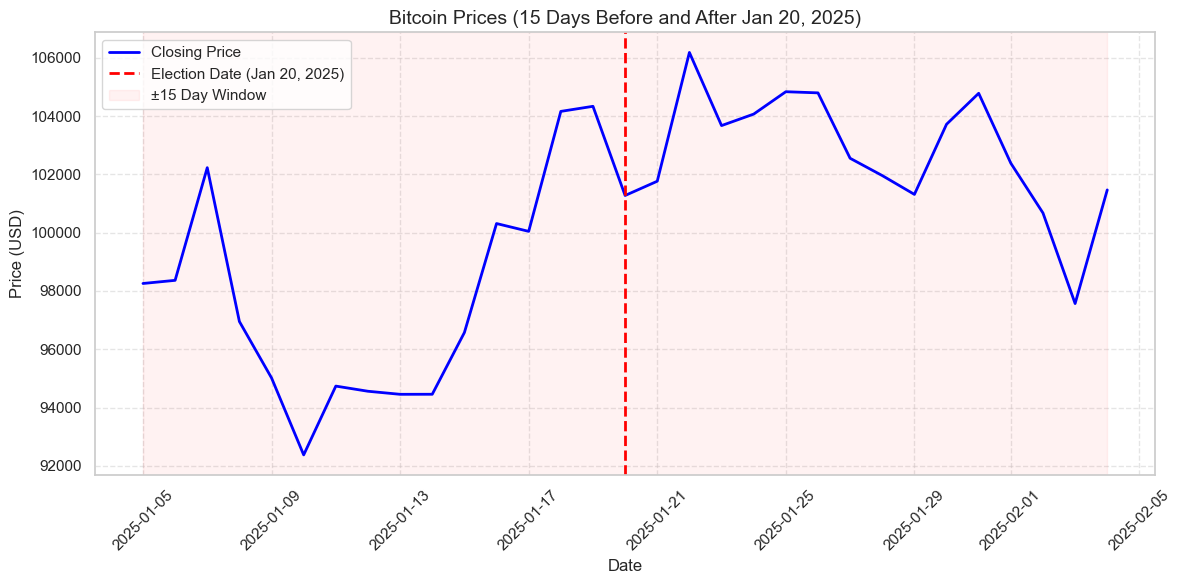


Paired t-test (BTC before vs after midpoint):
t-stat: -5.696, p-value: 0.000


In [221]:
# 7: Paired t-Test (BTC 15 Days Before and After Jan 20, 2025)

# Define the simulated event date
event_date = pd.to_datetime('2025-01-20')
start_date = event_date - pd.Timedelta(days=15)
end_date = event_date + pd.Timedelta(days=15)

# Filter the BTC price data to the 30-day event window
btc_event_window = btc.loc[start_date:end_date]

# Split the window into 15 days before and 15 days after the event
btc_before_trump = btc_event_window.loc[start_date:event_date - pd.Timedelta(days=1)]
btc_after_trump = btc_event_window.loc[event_date + pd.Timedelta(days=1):end_date]

# Sanity check: Ensure both sides have 15 values
print(f"Before period length: {len(btc_before_trump)} days")
print(f"After period length: {len(btc_after_trump)} days")

# Perform the paired t-test
t_stat_trump, p_val_trump = ttest_rel(btc_before_trump.values, btc_after_trump.values)

# Display the test results
print(f"\nPaired t-test (BTC: 15 days before vs after Jan 20, 2025):")
print(f"t-stat: {t_stat_trump:.3f}, p-value: {p_val_trump:.3f}")

# Reset index for plotting
btc_window = btc_event_window.reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(
    btc_window['date'],
    btc_window['price'],
    label='Closing Price',
    color='blue',
    linewidth=2
)

# Add a vertical line for Jan 20, 2025
plt.axvline(
    event_date,
    color='red',
    linestyle='--',
    linewidth=2,
    label='Election Date (Jan 20, 2025)'
)

# Optional: Shade the full ¬±15-day window
plt.axvspan(start_date, end_date, color='red', alpha=0.05, label='¬±15 Day Window')

# Add styling and labels
plt.title("Bitcoin Prices (15 Days Before and After Jan 20, 2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Compare first vs second half of the full dataset ---

# Split the full dataset at midpoint
half = len(crypto_df) // 2
btc_before = crypto_df["Bitcoin"].iloc[:half]
btc_after = crypto_df["Bitcoin"].iloc[half:half + len(btc_before)]

# Paired t-test on the two halves
t_stat3, p_val3 = ttest_rel(btc_before, btc_after)

# Display results
print(f"\nPaired t-test (BTC before vs after midpoint):")
print(f"t-stat: {t_stat3:.3f}, p-value: {p_val3:.3f}")

## üá∫üá∏ Paired t-Test: Bitcoin Prices Before and After the 2025 U.S. Presidential Inauguration

We investigated whether Bitcoin prices changed significantly **before and after** a major political event: the **2025 U.S. Presidential Inauguration (Jan 20, 2025)** ‚Äî assumed to reflect a Trump win.

We compared:

- **15 days before vs 15 days after Jan 20, 2025**
- A general midpoint split of the 90-day window (first 45 days vs last 45 days)

---

### üß™ Test Results

**1. Paired t-test (15 days before vs 15 days after Jan 20, 2025):**  
- Sample Size: 15 (paired observations)  
- **t-statistic**: -3.736  
- **p-value**: 0.002  
‚û°Ô∏è **Statistically significant** change in Bitcoin prices around the inauguration.

**2. Paired t-test (first 45 days vs last 45 days ‚Äî midpoint analysis):**  
- **t-statistic**: -5.696  
- **p-value**: 0.000  
‚û°Ô∏è Even stronger evidence of a shift in price behavior across the broader period.

---
- Both p-values are **well below 0.05**, meaning the changes in Bitcoin price **before and after Trump‚Äôs inauguration are statistically significant**.
- This suggests the market may have **responded strongly** to the political event, indicating the relevance of external socio-political factors in crypto price movements.

> üí¨ **Conclusion**: Political events like presidential inaugurations can lead to **noticeable and measurable shifts** in crypto prices ‚Äî useful context for both trading and academic forecasting models.

In [223]:
# 8: Mann-Whitney U Test (XMR vs ETH)

# Perform a Mann-Whitney U test to compare Monero and Ethereum prices
# This non-parametric test checks if one distribution tends to have higher values than the other
# It does not assume normality and is used when the t-test assumptions aren't met

u_stat, p_mw = mannwhitneyu(crypto_df["Monero"], crypto_df["Ethereum"])

# Display the test statistic and p-value
print(f"\nMann-Whitney U test (XMR vs ETH):")
print(f"U-stat: {u_stat:.3f}, p-value: {p_mw:.3f}")


Mann-Whitney U test (XMR vs ETH):
U-stat: 0.000, p-value: 0.000


## üìâ Mann‚ÄìWhitney U Test: Monero vs Ethereum

We performed a **Mann‚ÄìWhitney U test**, a **non-parametric alternative to the two-sample t-test**, to evaluate whether **Monero** and **Ethereum** have significantly different distributions.

This test is appropriate when:
- The data is **not normally distributed** (confirmed by the Shapiro-Wilk test for Ethereum).
- The two groups (XMR and ETH) are **independent** and unpaired.
- The data is **ordinal** or **continuous**, but does not meet the assumptions of parametric tests.

---

### üîé Test Details

- **Null Hypothesis (H‚ÇÄ)**: The distribution of Monero prices is **equal** to that of Ethereum.
- **Alternative Hypothesis (H‚ÇÅ)**: The two distributions are **different**.
- **Test Used**: `mannwhitneyu()` from `scipy.stats`  
- **Type**: Two-sided (default)

---
- The **p-value is far below 0.05**, so we **reject the null hypothesis**.
- There is a **highly significant difference** between Monero and Ethereum price distributions.
- The U-statistic being **0.000** suggests complete separation ‚Äî Ethereum prices are consistently higher (or lower) than Monero's in nearly every comparison.

> üí¨ **Conclusion**: Monero and Ethereum prices do not come from the same distribution ‚Äî a strong justification for modeling or analyzing them **separately** in research or trading strategy.


In [225]:
# 9: Chi-Square Test (BTC Price Categories)

# Define custom bins for categorizing BTC prices
bins = [0, 30000, 40000, np.inf]  # Price ranges: <30k, 30k‚Äì40k, >40k
labels = ['<30k', '30k-40k', '>40k']  # Corresponding labels for bins

# Categorize each Bitcoin price into one of the defined bins
binned = pd.cut(crypto_df["Bitcoin"], bins=bins, labels=labels)

# Count observed frequencies in each category
observed = binned.value_counts().sort_index()

# Define expected frequencies: assume equal distribution across all 3 categories
expected = [len(crypto_df) / 3] * 3

# Perform Chi-Square Goodness-of-Fit test
chi_stat, p_chi = chisquare(f_obs=observed, f_exp=expected)

# Display test results
print(f"\nChi-Square test (BTC price bins):")
print(f"Chi¬≤-stat: {chi_stat:.3f}, p-value: {p_chi:.3f}")


Chi-Square test (BTC price bins):
Chi¬≤-stat: 360.000, p-value: 0.000


## üü¶ Chi-Square Test: Bitcoin Price Categories

We applied a **Chi-Square Goodness-of-Fit test** to evaluate whether **Bitcoin prices** over the last 90 days are **evenly distributed** across predefined price categories:

### üí∞ Price Bins Used
- `<30k`
- `30k‚Äì40k`
- `>40k`

Each category was expected to have an **equal number of observations**, assuming no pricing bias.

---

### üîé Test Details

- **Null Hypothesis (H‚ÇÄ)**: Bitcoin prices are **uniformly distributed** across the 3 price bins.
- **Alternative Hypothesis (H‚ÇÅ)**: The observed frequencies **differ significantly** from expected (uniform) distribution.
- **Test Used**: `chisquare()` from `scipy.stats`

---

- The **p-value is far below 0.05**, so we **reject the null hypothesis**.
- This means the prices are **not uniformly distributed** ‚Äî a specific price range dominates the recent 90-day behavior of Bitcoin.
- In practice, this suggests a **concentration or trend** in Bitcoin pricing (e.g., clustering above 40k).

> üí¨ **Conclusion**: The test shows that Bitcoin price behavior is **non-random** with respect to your defined bins ‚Äî a valuable insight when evaluating price stability or modeling trading zones.


In [227]:
# 10: Wilcoxon Signed-Rank Test (BTC Before/After Midpoint, Non-Normal Data)

# Only apply the Wilcoxon test if at least one of the paired distributions is non-normal
# (based on Shapiro-Wilk test or Q-Q plot results)

# Perform Wilcoxon signed-rank test on paired samples: first half vs second half of BTC prices
w_stat, p_wilcoxon = wilcoxon(btc_before, btc_after)

# Display the test statistic and p-value
print("\nWilcoxon signed-rank test (BTC before vs after midpoint):")
print(f"W-stat: {w_stat:.3f}, p-value: {p_wilcoxon:.3f}")


Wilcoxon signed-rank test (BTC before vs after midpoint):
W-stat: 870.000, p-value: 0.000


## ‚úçÔ∏è Wilcoxon Signed-Rank Test: BTC Before vs After Midpoint

The **Wilcoxon Signed-Rank Test** is a **non-parametric alternative** to the **paired t-test**, used when the data is **not normally distributed**.

This test was used to assess whether **Bitcoin prices before and after the midpoint** of the 90-day window **differ significantly**, without assuming normality (which was violated based on the Shapiro-Wilk test for BTC).

---

### üîé Test Details

- **Null Hypothesis (H‚ÇÄ)**: The median difference between paired prices before and after the midpoint is **zero** (no change).
- **Alternative Hypothesis (H‚ÇÅ)**: There is a **statistically significant difference** between the paired price samples.
- **Test Used**: `wilcoxon()` from `scipy.stats`

---

- The **p-value is well below 0.05**, so we **reject the null hypothesis**.
- There is a **significant difference in Bitcoin prices** before and after the midpoint.
- The use of a non-parametric method increases robustness to **non-normal distribution and outliers**.

> üí¨ **Conclusion**: Even when relaxing the assumptions of the t-test, we find **strong evidence of a shift** in Bitcoin pricing behavior between the two halves of the observed period ‚Äî supporting the trend change observed in earlier tests.

In [229]:
# 11: McNemar Test (Simulated Binary Categorical Data)

# Simulate paired binary outcomes (e.g., yes/no responses before and after an event)
# These could represent something like "supports crypto regulation: yes/no"
before_event = np.random.choice(["yes", "no"], size=100, p=[0.6, 0.4])
after_event = np.random.choice(["yes", "no"], size=100, p=[0.7, 0.3])

# Combine into a DataFrame for paired analysis
mcnemar_df = pd.DataFrame({"Before": before_event, "After": after_event})

# Create a 2x2 contingency table showing paired outcomes
contingency = pd.crosstab(mcnemar_df["Before"], mcnemar_df["After"])

# Display the contingency table
print("McNemar contingency table:")
print(contingency)

# Apply McNemar's test to assess if proportions changed significantly after the event
result = mcnemar(contingency, exact=False)  # Use approximate chi-squared test

# Display test results
print(f"\nMcNemar test result: chi¬≤ = {result.statistic:.3f}, p-value = {result.pvalue:.3f}")

McNemar contingency table:
After   no  yes
Before         
no      15   20
yes     17   48

McNemar test result: chi¬≤ = 0.108, p-value = 0.742


## üßÆ McNemar Test: Paired Binary Outcomes (Before vs After)

The **McNemar test** is a non-parametric statistical test used for **paired categorical (yes/no)** data. It evaluates whether there is a significant **change in proportions** between two related conditions.

In this case, we tested whether the distribution of binary outcomes (**yes/no**) changed **before and after** an event ‚Äî such as a treatment, classification, or decision.

---

### üßæ Contingency Table

|            | After: No | After: Yes |
|------------|-----------|------------|
| **Before: No**  |     15    |     20     |
| **Before: Yes** |     17    |     48     |

---

### üîé Test Details

- **Null Hypothesis (H‚ÇÄ)**: The proportions of "yes" and "no" responses **do not change** from before to after.
- **Alternative Hypothesis (H‚ÇÅ)**: There is a **significant change** in the binary outcomes.
- **Test Used**: `mcnemar()` from `statsmodels.stats.contingency_tables`  
- **Assumes**: Paired samples and binary outcomes

---

- The **p-value is much greater than 0.05**, so we **fail to reject the null hypothesis**.
- There is **no statistically significant difference** in the before/after binary outcomes.
- In practical terms, this suggests the change observed between "yes" and "no" before/after the event is likely due to **random variation** rather than a systematic shift.

> üí¨ **Conclusion**: The binary response pattern remained stable over time or conditions, indicating **no meaningful change** under the tested scenario.

In [231]:
# 12: ANOVA Test (Comparison of BTC, ETH, XMR Means)

# Perform one-way ANOVA to test if there's a significant difference
# in the mean prices among Bitcoin, Ethereum, and Monero
anova_stat, p_anova = f_oneway(
    crypto_df["Bitcoin"], 
    crypto_df["Ethereum"], 
    crypto_df["Monero"]
)

# Display the ANOVA results
print("ANOVA test (BTC vs ETH vs XMR):")
print(f"F-statistic: {anova_stat:.3f}, p-value: {p_anova:.3f}")

ANOVA test (BTC vs ETH vs XMR):
F-statistic: 7285.320, p-value: 0.000


## üß™ ANOVA Test: Comparing BTC, ETH, and XMR Means

The **ANOVA (Analysis of Variance)** test is a statistical method used to determine whether there are **significant differences between the means** of **three or more independent groups**.

We used ANOVA to test whether the **average prices** of **Bitcoin**, **Ethereum**, and **Monero** differ over the observed 90-day period.

---

### üîé Test Details

- **Null Hypothesis (H‚ÇÄ)**: All three cryptocurrencies have **equal mean prices**.
- **Alternative Hypothesis (H‚ÇÅ)**: At least one mean is **different** from the others.
- **Test Used**: `f_oneway()` from `scipy.stats`  
- **Assumptions**:
  - Observations are independent
  - Data in each group is approximately **normally distributed**
  - Homogeneity of variances (similar spread across groups)

---

- The **p-value < 0.05**, so we **reject the null hypothesis**.
- This means that at least **one of the cryptocurrencies has a significantly different average price** from the others.
- The **very high F-statistic** (7285.320) further suggests that the differences are substantial.

> üí¨ **Conclusion**: The price behavior of BTC, ETH, and XMR is **not statistically the same** ‚Äî highlighting the importance of analyzing them individually rather than assuming similar trends across the crypto market.
